<a href="https://colab.research.google.com/github/madhav2381/KNN-algorithm-scratch/blob/main/CS418_KNN_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/IRIS_BANK_CURRENCY_MNIST.zip' '/content/' 
!unzip 'IRIS_BANK_CURRENCY_MNIST.zip'

Archive:  IRIS_BANK_CURRENCY_MNIST.zip
  inflating: data_banknote_authentication.csv  
  inflating: iris.csv                
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
columns = ["sepal_length","sepal_width","petal_length","petal_width","class"]
iris_data = pd.read_csv("/content/iris.csv", names=columns)

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
iris_data['class']= label_encoder.fit_transform(iris_data['class'])

In [ ]:
iris_data['class'].unique()

array([0, 1, 2])

<Figure size 432x288 with 0 Axes>

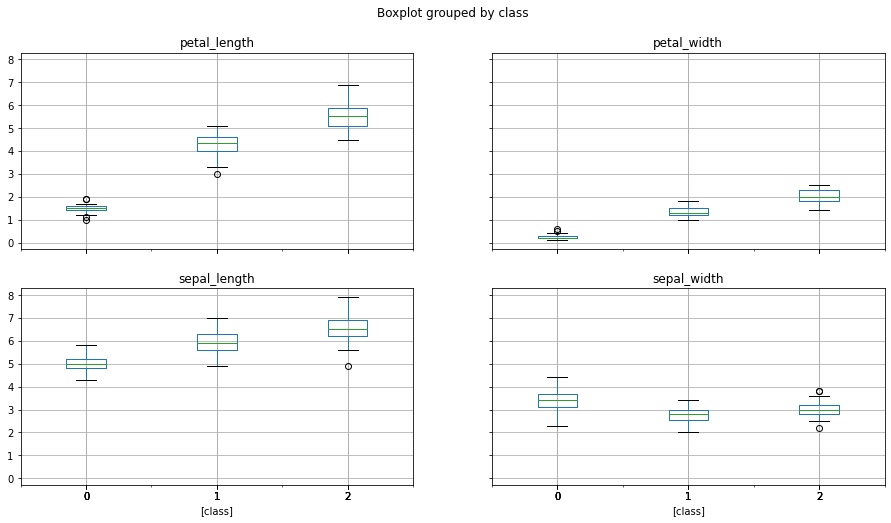

In [ ]:
plt.figure()
iris_data.boxplot(by="class", figsize=(15,8))
plt.show();

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(iris_data.loc[:,'sepal_length':'petal_width'], iris_data['class'], test_size=0.2)

In [ ]:
def knn(xtrain, ytrain, xtest, k, distance = 'Euclidean', voting = 'Majority', p =3):
    prediction = []
    k_nearest_neighbor_points = []
    for i in range(len(xtest)):
        y_class = []
        if distance == 'Euclidean' : 
            distances = np.sum((xtrain - xtest[i:i+1])**2, axis=1)
        if distance == 'Manhattan' :
            distances = np.sum(abs(xtrain - xtest[i:i+1]), axis =1)
        if distance == 'Minsokwi' :
            distances = np.sum(abs(xtrain - xtest[i:i+1])**p, axis =1)**(1/p)

        dist = sorted(distances)[:k]
        K_min_indexes = np.argsort(distances)[:k]
        k_nearest_neighbor_points.append([list(xtrain[index]) for index in K_min_indexes])
        y_class.append([ytrain[index] for index in K_min_indexes])

        if voting == 'Majority' :
            prediction.append(max(set(y_class[0]), key = y_class[0].count))
        if voting == 'inverse_distance' :
            w1 = 0
            w2 = 0
            #print("y",y_class)
            for d,y in zip(dist, y_class[0]):
                #print("d",d)
                if d!= 0.0 :
                    if y == 0 :
                        w1 = w1 + 1/d
                    if y == 1 :
                        w2 = w2 + 1/d
            #print(w1)
            #print(w2)
            prediction.append(0 if w1>w2 else 1)
    return prediction, k_nearest_neighbor_points, y_class

In [ ]:
x_min, x_max = xtrain.values[:, 0].min() - 1, xtrain.values[:, 0].max() + 1
y_min, y_max = xtrain.values[:, 1].min() - 1, xtrain.values[:, 1].max() + 1
# make the meshgrid
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])

k = 1
Confusion Matrix: [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
Accuracy Score: 0.9666666666666667


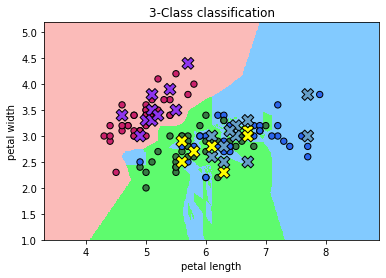

k = 2
Confusion Matrix: [[11  0  0]
 [ 0  7  0]
 [ 0  2 10]]
Accuracy Score: 0.9333333333333333


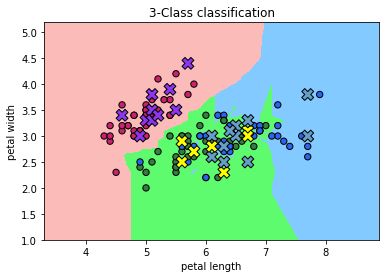

k = 4
Confusion Matrix: [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
Accuracy Score: 0.9666666666666667


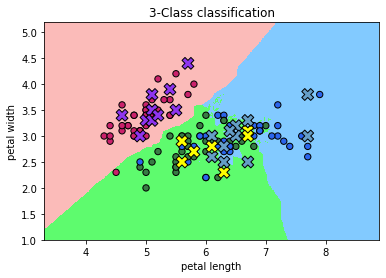

k = 6
Confusion Matrix: [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
Accuracy Score: 0.9666666666666667


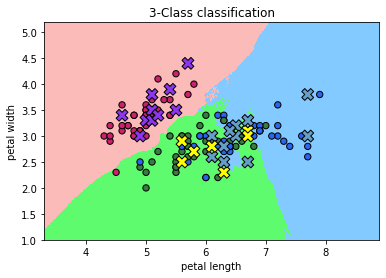

k = 8
Confusion Matrix: [[11  0  0]
 [ 0  7  0]
 [ 0  2 10]]
Accuracy Score: 0.9333333333333333


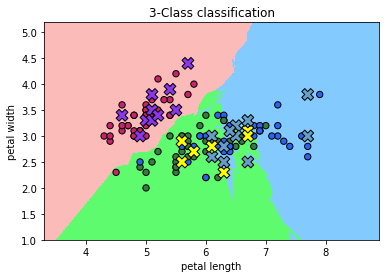

k = 10
Confusion Matrix: [[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
Accuracy Score: 1.0


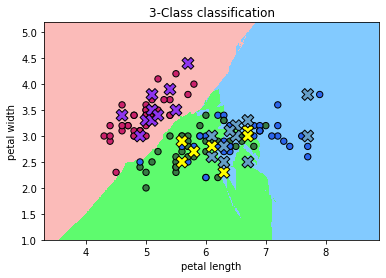

In [ ]:
for k in [1,2,4,6,8,10]:
    Z, k_nearest_neighbor_points, y_class = knn(xtrain.loc[:,'sepal_length':'sepal_width'].values, ytrain.values, np.c_[xx.ravel(), yy.ravel()], k)

    print("k =",k)
    ypred = knn(xtrain.values, ytrain.values, xtest.values, k)[0]
    print("Confusion Matrix:", confusion_matrix(ytest, ypred))
    print("Accuracy Score:", accuracy_score(ytest, ypred))
    # plot the outcome
    Z = np.array(Z).reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(xtrain.values[:, 0], xtrain.values[:, 1], c=ytrain, cmap=cmap_bold,edgecolor='k', s=40)
    plt.scatter(xtest.values[:, 0], xtest.values[:, 1], c=ytest, cmap=cmap_test, edgecolor='k', marker = 'X', s=140)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.title("3-Class classification")
    plt.show();

#2. Bank Notes Dataset

In [ ]:
columns = ['variance','skewness','kurtosis','entropy','class']
bank_data = pd.read_csv("/content/data_banknote_authentication.csv", names = columns)

In [ ]:
bank_data.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
bank_data.shape

(1372, 5)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(bank_data.loc[:,'variance':'entropy'],bank_data['class'], test_size=0.2)

In [ ]:
ypred = knn(xtrain.values, ytrain.values, xtest.values, 2)[0]
print("Confusion Matrix:", confusion_matrix(ytest, ypred))
print("Accuracy Score:", accuracy_score(ytest, ypred))

Confusion Matrix: [[160   0]
 [  0 115]]
Accuracy Score: 1.0


In [ ]:
ypred = knn(xtrain.values, ytrain.values, xtest.values, 2, voting = 'inverse_distance')[0]
print("Confusion Matrix:", confusion_matrix(ytest, ypred))
print("Accuracy Score:", accuracy_score(ytest, ypred))
print("Error:", 1 - accuracy_score(ytest,ypred))

Confusion Matrix: [[154   6]
 [  0 115]]
Accuracy Score: 0.9781818181818182
Error: 0.021818181818181848


In [ ]:
ypred = knn(xtrain.values, ytrain.values, xtest.values, 2, distance = 'Manhattan', voting = 'inverse_distance')[0]
print("Confusion Matrix:", confusion_matrix(ytest, ypred))
print("Accuracy Score:", accuracy_score(ytest, ypred))
print("Error:", 1 - accuracy_score(ytest,ypred))

Confusion Matrix: [[154   6]
 [  0 115]]
Accuracy Score: 0.9781818181818182
Error: 0.021818181818181848



In [ ]:
ypred = knn(xtrain.values, ytrain.values, xtest.values, 2, distance = 'Minsokwi', voting = 'inverse_distance')[0]
print("Confusion Matrix:", confusion_matrix(ytest, ypred))
print("Accuracy Score:", accuracy_score(ytest, ypred))
print("Error:", 1 - accuracy_score(ytest,ypred))

Confusion Matrix: [[154   6]
 [  0 115]]
Accuracy Score: 0.9781818181818182
Error: 0.021818181818181848


# MNIST Dataset

In [ ]:
mnist_train =  pd.read_csv("/content/mnist_train.csv", header = None)

In [ ]:
mnist_test =   pd.read_csv("/content/mnist_test.csv", header = None)

In [ ]:
train_exmp = [500, 1000, 2500, 5000, 10000] 
acc = []
xtest = mnist_test.loc[:999, 1:].values
ytest = mnist_test[:1000][0].values
for i in train_exmp:
    xtrain = mnist_train.loc[:i-1, 1:].values
    ytrain = mnist_train[:i][0].values
    ypred = knn( xtrain, ytrain, xtest, 2)[0]
    #print("Confusion Matrix:", confusion_matrix(ytest, ypred))
    print("Accuracy Score:", accuracy_score(ytest, ypred))
    acc.append(accuracy_score(ytest, ypred))
Error_list = [1-i for i in acc]
print("Error list:", Error_list)

Accuracy Score: 0.735
Accuracy Score: 0.803
Accuracy Score: 0.872
Accuracy Score: 0.894
Accuracy Score: 0.906
Error list: [0.265, 0.19699999999999995, 0.128, 0.10599999999999998, 0.09399999999999997]


In [ ]:
print("Confusion Matrix:", confusion_matrix(ytest, ypred))

Confusion Matrix: [[ 85   0   0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  3   3  98   0   1   0   0   5   6   0]
 [  0   1   1  98   0   0   1   2   2   2]
 [  0   2   0   0  89   0   1   0   1  17]
 [  1   1   0   8   0  71   0   1   4   1]
 [  3   0   0   0   1   0  83   0   0   0]
 [  0   5   0   0   2   1   0  89   0   2]
 [  1   3   1   1   0   1   0   0  81   1]
 [  0   1   0   0   2   0   0   2   3  86]]


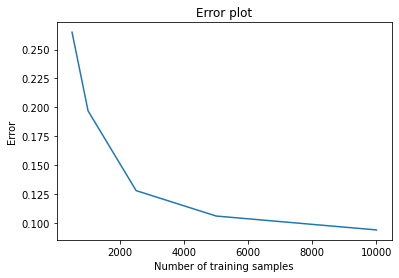

In [ ]:
plt.plot([500,1000,2500,5000,10000], Error_list)
plt.xlabel("Number of training samples")
plt.ylabel("Error")
plt.title("Error plot");